# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_id = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse_id_df = pd.DataFrame(duplicated_mouse_id)
duplicated_mouse_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merged_df = merged_df.drop_duplicates("Mouse ID")
new_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
new_merged_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groups = new_merged_df.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = groups["Tumor Volume (mm3)"].mean()
median = groups["Tumor Volume (mm3)"].median()
variance = groups["Tumor Volume (mm3)"].var()
st_dev = groups["Tumor Volume (mm3)"].std()
sem = groups["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame ({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Std. Dev.": st_dev,
                        "Tumor Volume Std. Err.": sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
groups["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

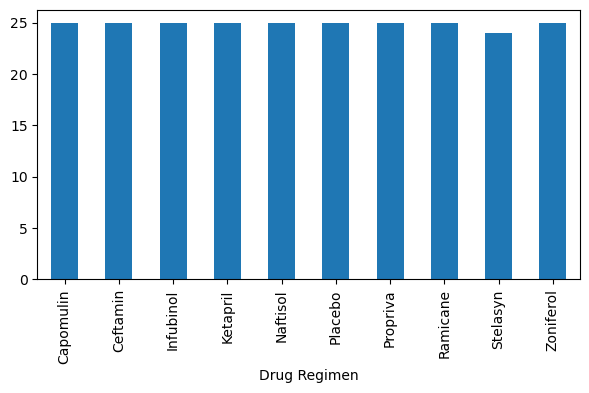

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = groups.size()


timepoints.plot(kind="bar", figsize=(7,3.5))


plt.show()
plt.tight_layout()

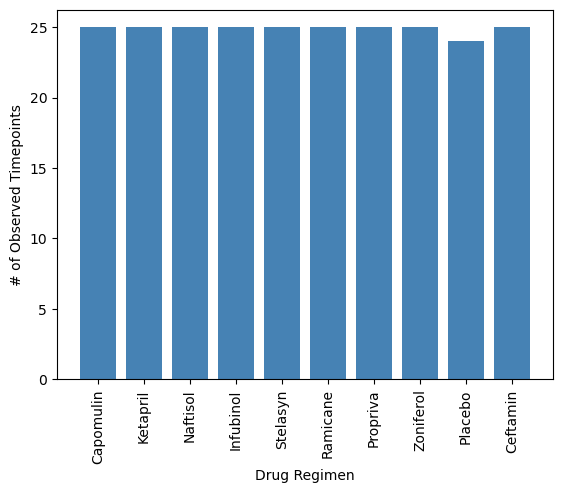

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = new_merged_df["Drug Regimen"].unique()
y = groups.size()

plt.bar(x, y, color = 'steelblue', align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation="vertical")
plt.show()

,Sex
Male,958
Female,935


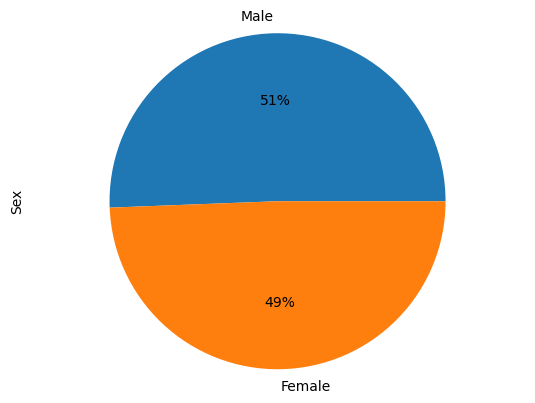

In [133]:
# Created a df to calculate the amount of female and male mice
pie = merged_df["Sex"].value_counts()
pie.head()

pie_df = pd.DataFrame(pie)


# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie.plot(kind="pie", y=["Sex"], autopct='%1.0f%%')
plt.axis("equal")
plt.show()

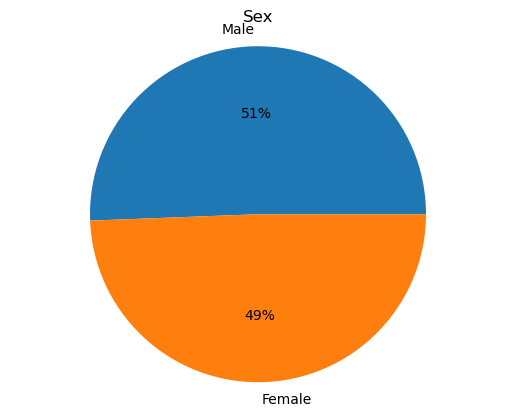

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
quantities = [958, 935]
labels = ["Male", "Female"]
colors = ["blue", "orange"]
explode = (0, 0)

plt.pie(quantities, explode=explode, labels=labels, autopct="%1.0f%%")
plt.axis("equal")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group2 = merged_df.groupby("Mouse ID")
group2.head()
max_timepoint = group2["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
TV_max_timepoint_df = pd.merge(max_timepoint_df, merged_df, how="left", on=["Mouse ID", "Mouse ID"])
TV_max_timepoint_df


,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1888,z969,45,25,63.145652,2,Naftisol,Male,9,30
1889,z969,45,30,65.841013,3,Naftisol,Male,9,30
1890,z969,45,35,69.176246,4,Naftisol,Male,9,30
1891,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [207]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = TV_max_timepoint_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq - lowerq 


    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

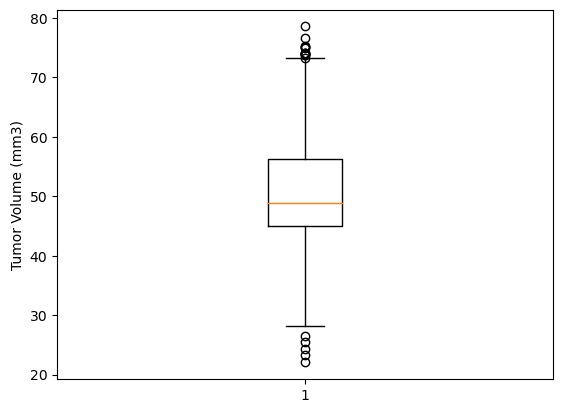

In [193]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = TV_max_timepoint_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(boxplot)
plt.show()

## Line and Scatter Plots

In [31]:
# Selected the Mouse ID l509
filtered = merged_df.loc[merged_df["Mouse ID"] == "l509"]
filtered_df = pd.DataFrame(filtered)
filtered_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


<function matplotlib.pyplot.show(close=None, block=None)>

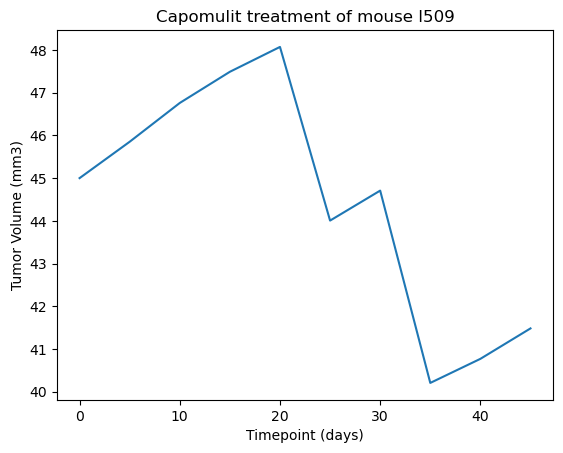

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = filtered_df["Timepoint"]
y_axis = filtered_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulit treatment of mouse l509")
plt.show

In [82]:
# Selected the Capomulin Regimen
filtered2 = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
filtered2_df = pd.DataFrame(filtered2)

#Calculated the mean Tumor Volume for each mouse 
mean_tv = filtered2_df.groupby(["Mouse ID"]).mean()

/var/folders/fy/q_c7fyq97_l5285qkhzg265c0000gn/T/ipykernel_31358/149778160.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tv = filtered2_df.groupby(["Mouse ID"]).mean()


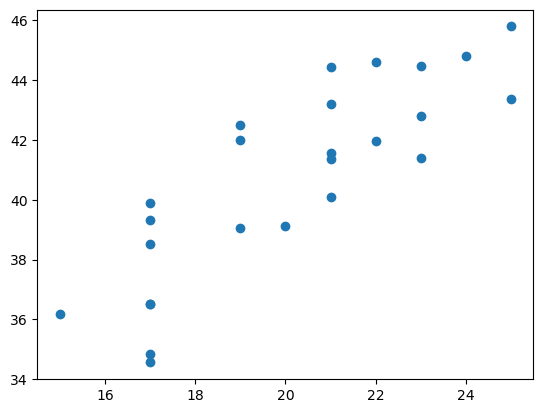

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_scatter = mean_tv ["Weight (g)"]
y_scatter = mean_tv["Tumor Volume (mm3)"]
plt.scatter(x_scatter, y_scatter, marker="o")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


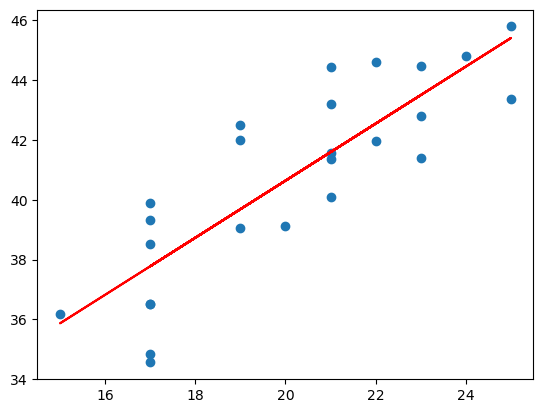

In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_scatter, y_scatter)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_scatter = mean_tv ["Weight (g)"]
y_scatter = mean_tv["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_scatter,y_scatter)
plt.plot(x_scatter,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()